# Wisconsin Breast Cancer Original Dataset

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Importing the dataset

In [2]:
dataset = pd.read_csv("Breast Cancer Coimbra.csv")

## Exploratory data analysis

In [3]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
dataset.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [5]:
dataset.shape

(116, 10)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [7]:
dataset.isna()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
111,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,False,False
113,False,False,False,False,False,False,False,False,False,False
114,False,False,False,False,False,False,False,False,False,False


In [8]:
dataset.isna().any()

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool

In [9]:
dataset.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

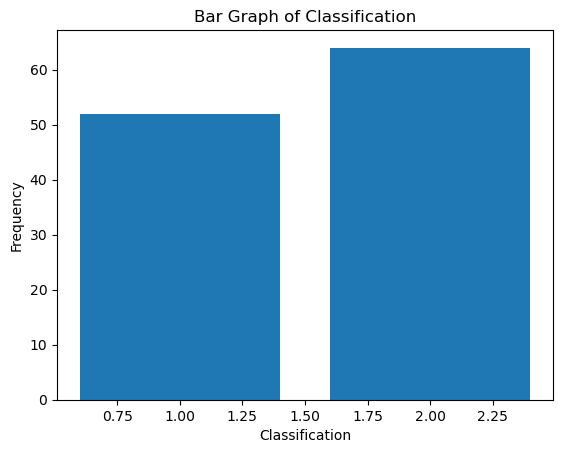

In [10]:
x_column = "Classification"
value_counts = dataset[x_column].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Classification")
plt.ylabel("Frequency")
plt.title("Bar Graph of Classification")
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

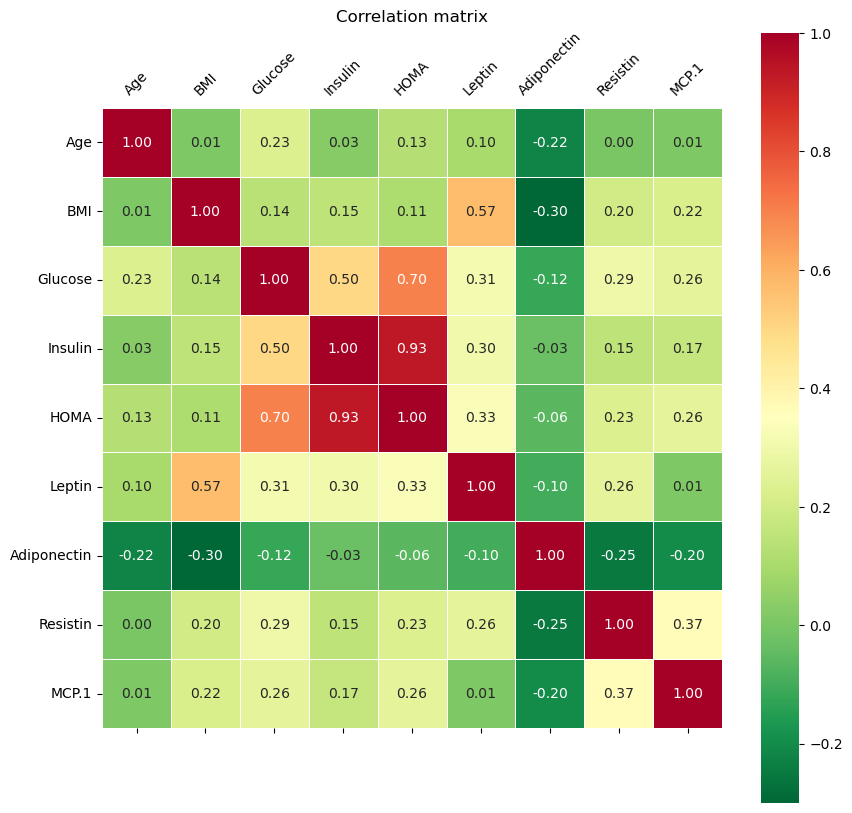

In [11]:
cols = dataset.columns[0:-1]
correlation = dataset[cols].corr('pearson')
plt.figure(figsize=(10,10), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.heatmap(correlation.round(2), cmap='RdYlGn_r', linewidths=0.5, annot=True,
                 cbar=True, square=True, fmt='0.2f')
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False, labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Correlation matrix')

## Data preprocessing

In [12]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

### Encoding the dependent variable

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


### Splitting the dataset into the training set and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the training set

In [17]:
from sklearn.svm import SVC
svc_model_1 = SVC(kernel = "linear", C = 0.05)
svc_model_2 = SVC(kernel = "poly", degree = 2)
svc_model_3 = SVC(kernel = "poly", degree = 3)
svc_model_4 = SVC(kernel = "poly", degree = 4)
svc_model_5 = SVC(kernel = "poly", degree = 5)
svc_model_6 = SVC(kernel = "rbf", gamma = "scale")
svc_model_7 = SVC(kernel = "rbf", gamma = "auto")
svc_model_8 = SVC(kernel = "sigmoid", gamma = "scale")
svc_model_9 = SVC(kernel = "sigmoid", gamma = "auto")

svc_model_1.fit(X_train, y_train)
svc_model_2.fit(X_train, y_train)
svc_model_3.fit(X_train, y_train)
svc_model_4.fit(X_train, y_train)
svc_model_5.fit(X_train, y_train)
svc_model_6.fit(X_train, y_train)
svc_model_7.fit(X_train, y_train)
svc_model_8.fit(X_train, y_train)
svc_model_9.fit(X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = [("svc_model_1", svc_model_1), ("svc_model_2", svc_model_2), ("svc_model_3", svc_model_3),
          ("svc_model_4", svc_model_4), ("svc_model_5", svc_model_5), ("svc_model_6", svc_model_6),
          ("svc_model_7", svc_model_7), ("svc_model_8", svc_model_8), ("svc_model_9", svc_model_9)]

for name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Confusion matrix for", name, ":\n", cm)
    print("Accuracy for", name, ":", accuracy)
    print("Precision for", name, ":", precision)
    print("Recall for", name, ":", recall)
    print("F1 score for", name, ":", f1)
    print("--------------------------------------------------")

Confusion matrix for svc_model_1 :
 [[9 3]
 [3 9]]
Accuracy for svc_model_1 : 0.75
Precision for svc_model_1 : 0.75
Recall for svc_model_1 : 0.75
F1 score for svc_model_1 : 0.75
--------------------------------------------------
Confusion matrix for svc_model_2 :
 [[ 4  8]
 [ 2 10]]
Accuracy for svc_model_2 : 0.5833333333333334
Precision for svc_model_2 : 0.5555555555555556
Recall for svc_model_2 : 0.8333333333333334
F1 score for svc_model_2 : 0.6666666666666667
--------------------------------------------------
Confusion matrix for svc_model_3 :
 [[ 5  7]
 [ 1 11]]
Accuracy for svc_model_3 : 0.6666666666666666
Precision for svc_model_3 : 0.6111111111111112
Recall for svc_model_3 : 0.9166666666666666
F1 score for svc_model_3 : 0.7333333333333334
--------------------------------------------------
Confusion matrix for svc_model_4 :
 [[ 3  9]
 [ 2 10]]
Accuracy for svc_model_4 : 0.5416666666666666
Precision for svc_model_4 : 0.5263157894736842
Recall for svc_model_4 : 0.8333333333333334
F

## Training the ANN model on the training set

In [19]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7536 - accuracy: 0.5761
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7457 - accuracy: 0.5761
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 0.7397 - accuracy: 0.5761
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.5761
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.7280 - accuracy: 0.5978
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.7215 - accuracy: 0.5978
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7174 - accuracy: 0.5761
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7115 - accuracy: 0.5870
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.5870
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.5761
Epoch 11/100
3/3 [===========

3/3 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.6522
Epoch 85/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.6522
Epoch 86/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5910 - accuracy: 0.6522
Epoch 87/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.6522
Epoch 88/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.6630
Epoch 89/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5869 - accuracy: 0.6630
Epoch 90/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.6630
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5841 - accuracy: 0.6630
Epoch 92/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.6739
Epoch 93/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.6739
Epoch 94/100
3/3 [===============

In [20]:
# Make predictions on the test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("--------------------------------------------------")

1/1 [==============================] - 0s 61ms/step
Confusion Matrix:
 [[ 9  3]
 [ 1 11]]
Accuracy: 0.8333333333333334
Precision: 0.7857142857142857
Recall: 0.9166666666666666
F1-score: 0.8461538461538461
--------------------------------------------------


In [21]:
# Define the models and their names
models = [("svc_model_1", svc_model_1), ("svc_model_2", svc_model_2), ("svc_model_3", svc_model_3),
          ("svc_model_4", svc_model_4), ("svc_model_5", svc_model_5), ("svc_model_6", svc_model_6),
          ("svc_model_7", svc_model_7), ("svc_model_8", svc_model_8), ("svc_model_9", svc_model_9)]

# Create an empty list to store the metrics
metrics_list = []

# Loop through the models and calculate the metrics
for name, model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the metrics to the list
    metrics_list.append([name, accuracy, precision, recall, f1])

# Create a pandas dataframe from the metrics list
metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Print the dataframe
print(metrics_df)

         Model  Accuracy  Precision    Recall  F1-score
0  svc_model_1  0.750000   0.750000  0.750000  0.750000
1  svc_model_2  0.583333   0.555556  0.833333  0.666667
2  svc_model_3  0.666667   0.611111  0.916667  0.733333
3  svc_model_4  0.541667   0.526316  0.833333  0.645161
4  svc_model_5  0.541667   0.523810  0.916667  0.666667
5  svc_model_6  0.875000   0.909091  0.833333  0.869565
6  svc_model_7  0.875000   0.909091  0.833333  0.869565
7  svc_model_8  0.750000   0.750000  0.750000  0.750000
8  svc_model_9  0.750000   0.750000  0.750000  0.750000


In [22]:
# Calculate the metrics for the neural network model
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dataframe for the neural network model
nn_df = pd.DataFrame([["ann_model", accuracy, precision, recall, f1]], 
                     columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Concatenate the dataframes
metrics_df = pd.concat([metrics_df, nn_df], ignore_index=True)

# Print the concatenated dataframe
print(metrics_df)

1/1 [==============================] - 0s 15ms/step
         Model  Accuracy  Precision    Recall  F1-score
0  svc_model_1  0.750000   0.750000  0.750000  0.750000
1  svc_model_2  0.583333   0.555556  0.833333  0.666667
2  svc_model_3  0.666667   0.611111  0.916667  0.733333
3  svc_model_4  0.541667   0.526316  0.833333  0.645161
4  svc_model_5  0.541667   0.523810  0.916667  0.666667
5  svc_model_6  0.875000   0.909091  0.833333  0.869565
6  svc_model_7  0.875000   0.909091  0.833333  0.869565
7  svc_model_8  0.750000   0.750000  0.750000  0.750000
8  svc_model_9  0.750000   0.750000  0.750000  0.750000
9    ann_model  0.833333   0.785714  0.916667  0.846154


## Applying PCA

In [23]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca = PCA()
param_grid = {'n_components': [1, 2, 3, 4, 5]}
grid_search = GridSearchCV(pca, param_grid, cv=10)
grid_search.fit(X_train)
print(grid_search.best_params_)

{'n_components': 4}


In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)

In [26]:
from sklearn.svm import SVC
svc_pca_1 = SVC(kernel = "linear", C = 0.05)
svc_pca_2 = SVC(kernel = "poly", degree = 2)
svc_pca_3 = SVC(kernel = "poly", degree = 3)
svc_pca_4 = SVC(kernel = "poly", degree = 4)
svc_pca_5 = SVC(kernel = "poly", degree = 5)
svc_pca_6 = SVC(kernel = "rbf", gamma = "scale")
svc_pca_7 = SVC(kernel = "rbf", gamma = "auto")
svc_pca_8 = SVC(kernel = "sigmoid", gamma = "scale")
svc_pca_9 = SVC(kernel = "sigmoid", gamma = "auto")

svc_pca_1.fit(pca_X_train, y_train)
svc_pca_2.fit(pca_X_train, y_train)
svc_pca_3.fit(pca_X_train, y_train)
svc_pca_4.fit(pca_X_train, y_train)
svc_pca_5.fit(pca_X_train, y_train)
svc_pca_6.fit(pca_X_train, y_train)
svc_pca_7.fit(pca_X_train, y_train)
svc_pca_8.fit(pca_X_train, y_train)
svc_pca_9.fit(pca_X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = [("svc_pca_1", svc_pca_1), ("svc_pca_2", svc_pca_2), ("svc_pca_3", svc_pca_3),
          ("svc_pca_4", svc_pca_4), ("svc_pca_5", svc_pca_5), ("svc_pca_6", svc_pca_6),
          ("svc_pca_7", svc_pca_7), ("svc_pca_8", svc_pca_8), ("svc_pca_9", svc_pca_9)]

for name, model in models:
    y_pred = model.predict(pca_X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Confusion matrix for", name, ":\n", cm)
    print("Accuracy for", name, ":", accuracy)
    print("Precision for", name, ":", precision)
    print("Recall for", name, ":", recall)
    print("F1 score for", name, ":", f1)
    print("--------------------------------------------------")

Confusion matrix for svc_pca_1 :
 [[ 8  4]
 [ 2 10]]
Accuracy for svc_pca_1 : 0.75
Precision for svc_pca_1 : 0.7142857142857143
Recall for svc_pca_1 : 0.8333333333333334
F1 score for svc_pca_1 : 0.7692307692307692
--------------------------------------------------
Confusion matrix for svc_pca_2 :
 [[ 3  9]
 [ 0 12]]
Accuracy for svc_pca_2 : 0.625
Precision for svc_pca_2 : 0.5714285714285714
Recall for svc_pca_2 : 1.0
F1 score for svc_pca_2 : 0.7272727272727273
--------------------------------------------------
Confusion matrix for svc_pca_3 :
 [[ 5  7]
 [ 1 11]]
Accuracy for svc_pca_3 : 0.6666666666666666
Precision for svc_pca_3 : 0.6111111111111112
Recall for svc_pca_3 : 0.9166666666666666
F1 score for svc_pca_3 : 0.7333333333333334
--------------------------------------------------
Confusion matrix for svc_pca_4 :
 [[ 3  9]
 [ 1 11]]
Accuracy for svc_pca_4 : 0.5833333333333334
Precision for svc_pca_4 : 0.55
Recall for svc_pca_4 : 0.9166666666666666
F1 score for svc_pca_4 : 0.68749999

In [28]:
ann_pca = tf.keras.models.Sequential()
ann_pca.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann_pca.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann_pca.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann_pca.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
ann_pca.fit(pca_X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.4457
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8561 - accuracy: 0.4457
Epoch 3/100
3/3 [==============================] - 0s 1ms/step - loss: 0.8498 - accuracy: 0.4565
Epoch 4/100
3/3 [==============================] - 0s 1ms/step - loss: 0.8428 - accuracy: 0.4783
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.8373 - accuracy: 0.5109
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.8307 - accuracy: 0.5326
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8256 - accuracy: 0.5326
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8206 - accuracy: 0.5326
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8159 - accuracy: 0.5326
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.8110 - accuracy: 0.5652
Epoch 11/100
3/3 [===========

3/3 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.6630
Epoch 85/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.6630
Epoch 86/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.6522
Epoch 87/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.6630
Epoch 88/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.6522
Epoch 89/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.6522
Epoch 90/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.6522
Epoch 91/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.6522
Epoch 92/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.6522
Epoch 93/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5911 - accuracy: 0.6522
Epoch 94/100
3/3 [===============

In [29]:
# Make predictions on the test set
y_pred = ann_pca.predict(pca_X_test)
y_pred = (y_pred > 0.5)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("--------------------------------------------------")

1/1 [==============================] - 0s 36ms/step
Confusion Matrix:
 [[ 7  5]
 [ 2 10]]
Accuracy: 0.7083333333333334
Precision: 0.6666666666666666
Recall: 0.8333333333333334
F1-score: 0.7407407407407408
--------------------------------------------------


In [30]:
# Define the models and their names
models = [("svc_pca_1", svc_pca_1), ("svc_pca_2", svc_pca_2), ("svc_pca_3", svc_pca_3),
          ("svc_pca_4", svc_pca_4), ("svc_pca_5", svc_pca_5), ("svc_pca_6", svc_pca_6),
          ("svc_pca_7", svc_pca_7), ("svc_pca_8", svc_pca_8), ("svc_pca_9", svc_pca_9)]

# Create an empty list to store the metrics
metrics_list = []

# Loop through the models and calculate the metrics
for name, model in models:
    y_pred = model.predict(pca_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the metrics to the list
    metrics_list.append([name, accuracy, precision, recall, f1])

# Create a pandas dataframe from the metrics list
metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Print the dataframe
print(metrics_df)

       Model  Accuracy  Precision    Recall  F1-score
0  svc_pca_1  0.750000   0.714286  0.833333  0.769231
1  svc_pca_2  0.625000   0.571429  1.000000  0.727273
2  svc_pca_3  0.666667   0.611111  0.916667  0.733333
3  svc_pca_4  0.583333   0.550000  0.916667  0.687500
4  svc_pca_5  0.583333   0.550000  0.916667  0.687500
5  svc_pca_6  0.791667   0.733333  0.916667  0.814815
6  svc_pca_7  0.833333   0.833333  0.833333  0.833333
7  svc_pca_8  0.625000   0.600000  0.750000  0.666667
8  svc_pca_9  0.625000   0.600000  0.750000  0.666667


In [31]:
# Calculate the metrics for the neural network model
y_pred = ann_pca.predict(pca_X_test)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dataframe for the neural network model
nn_df = pd.DataFrame([["ann_pca", accuracy, precision, recall, f1]], 
                     columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Concatenate the dataframes
metrics_df = pd.concat([metrics_df, nn_df], ignore_index=True)

# Print the concatenated dataframe
print(metrics_df)

1/1 [==============================] - 0s 16ms/step
       Model  Accuracy  Precision    Recall  F1-score
0  svc_pca_1  0.750000   0.714286  0.833333  0.769231
1  svc_pca_2  0.625000   0.571429  1.000000  0.727273
2  svc_pca_3  0.666667   0.611111  0.916667  0.733333
3  svc_pca_4  0.583333   0.550000  0.916667  0.687500
4  svc_pca_5  0.583333   0.550000  0.916667  0.687500
5  svc_pca_6  0.791667   0.733333  0.916667  0.814815
6  svc_pca_7  0.833333   0.833333  0.833333  0.833333
7  svc_pca_8  0.625000   0.600000  0.750000  0.666667
8  svc_pca_9  0.625000   0.600000  0.750000  0.666667
9    ann_pca  0.708333   0.666667  0.833333  0.740741


## Applying LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
lda_X_train = lda.fit_transform(X_train, y_train)
lda_X_test = lda.transform(X_test)

In [33]:
from sklearn.svm import SVC
svc_lda_1 = SVC(kernel = "linear", C = 0.05)
svc_lda_2 = SVC(kernel = "poly", degree = 2)
svc_lda_3 = SVC(kernel = "poly", degree = 3)
svc_lda_4 = SVC(kernel = "poly", degree = 4)
svc_lda_5 = SVC(kernel = "poly", degree = 5)
svc_lda_6 = SVC(kernel = "rbf", gamma = "scale")
svc_lda_7 = SVC(kernel = "rbf", gamma = "auto")
svc_lda_8 = SVC(kernel = "sigmoid", gamma = "scale")
svc_lda_9 = SVC(kernel = "sigmoid", gamma = "auto")

svc_lda_1.fit(lda_X_train, y_train)
svc_lda_2.fit(lda_X_train, y_train)
svc_lda_3.fit(lda_X_train, y_train)
svc_lda_4.fit(lda_X_train, y_train)
svc_lda_5.fit(lda_X_train, y_train)
svc_lda_6.fit(lda_X_train, y_train)
svc_lda_7.fit(lda_X_train, y_train)
svc_lda_8.fit(lda_X_train, y_train)
svc_lda_9.fit(lda_X_train, y_train)

SVC(gamma='auto', kernel='sigmoid')

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = [("svc_lda_1", svc_lda_1), ("svc_lda_2", svc_lda_2), ("svc_lda_3", svc_lda_3),
          ("svc_lda_4", svc_lda_4), ("svc_lda_5", svc_lda_5), ("svc_lda_6", svc_lda_6),
          ("svc_lda_7", svc_lda_7), ("svc_lda_8", svc_lda_8), ("svc_lda_9", svc_lda_9)]

for name, model in models:
    y_pred = model.predict(lda_X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Confusion matrix for", name, ":\n", cm)
    print("Accuracy for", name, ":", accuracy)
    print("Precision for", name, ":", precision)
    print("Recall for", name, ":", recall)
    print("F1 score for", name, ":", f1)
    print("--------------------------------------------------")

Confusion matrix for svc_lda_1 :
 [[12  0]
 [ 4  8]]
Accuracy for svc_lda_1 : 0.8333333333333334
Precision for svc_lda_1 : 1.0
Recall for svc_lda_1 : 0.6666666666666666
F1 score for svc_lda_1 : 0.8
--------------------------------------------------
Confusion matrix for svc_lda_2 :
 [[ 0 12]
 [ 0 12]]
Accuracy for svc_lda_2 : 0.5
Precision for svc_lda_2 : 0.5
Recall for svc_lda_2 : 1.0
F1 score for svc_lda_2 : 0.6666666666666666
--------------------------------------------------
Confusion matrix for svc_lda_3 :
 [[ 9  3]
 [ 1 11]]
Accuracy for svc_lda_3 : 0.8333333333333334
Precision for svc_lda_3 : 0.7857142857142857
Recall for svc_lda_3 : 0.9166666666666666
F1 score for svc_lda_3 : 0.8461538461538461
--------------------------------------------------
Confusion matrix for svc_lda_4 :
 [[ 0 12]
 [ 0 12]]
Accuracy for svc_lda_4 : 0.5
Precision for svc_lda_4 : 0.5
Recall for svc_lda_4 : 1.0
F1 score for svc_lda_4 : 0.6666666666666666
--------------------------------------------------
Conf

In [35]:
ann_lda = tf.keras.models.Sequential()
ann_lda.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann_lda.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann_lda.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann_lda.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
ann_lda.fit(lda_X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5652
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5652
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5652
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5652
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5652
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5652
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5652
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5652
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5652
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.5652
Epoch 11/100
3/3 [===========

3/3 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.7935
Epoch 85/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5582 - accuracy: 0.7935
Epoch 86/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7935
Epoch 87/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5570 - accuracy: 0.7935
Epoch 88/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5567 - accuracy: 0.7935
Epoch 89/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7935
Epoch 90/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.7935
Epoch 91/100
3/3 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7935
Epoch 92/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7935
Epoch 93/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7935
Epoch 94/100
3/3 [===============

In [36]:
# Make predictions on the test set
y_pred = ann_lda.predict(lda_X_test)
y_pred = (y_pred > 0.5)

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("--------------------------------------------------")

1/1 [==============================] - 0s 38ms/step
Confusion Matrix:
 [[11  1]
 [ 1 11]]
Accuracy: 0.9166666666666666
Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1-score: 0.9166666666666666
--------------------------------------------------


In [37]:
# Define the models and their names
models = [("svc_lda_1", svc_lda_1), ("svc_lda_2", svc_lda_2), ("svc_lda_3", svc_lda_3),
          ("svc_lda_4", svc_lda_4), ("svc_lda_5", svc_lda_5), ("svc_lda_6", svc_lda_6),
          ("svc_lda_7", svc_lda_7), ("svc_lda_8", svc_lda_8), ("svc_lda_9", svc_lda_9)]

# Create an empty list to store the metrics
metrics_list = []

# Loop through the models and calculate the metrics
for name, model in models:
    y_pred = model.predict(lda_X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the metrics to the list
    metrics_list.append([name, accuracy, precision, recall, f1])

# Create a pandas dataframe from the metrics list
metrics_df = pd.DataFrame(metrics_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Print the dataframe
print(metrics_df)

       Model  Accuracy  Precision    Recall  F1-score
0  svc_lda_1  0.833333   1.000000  0.666667  0.800000
1  svc_lda_2  0.500000   0.500000  1.000000  0.666667
2  svc_lda_3  0.833333   0.785714  0.916667  0.846154
3  svc_lda_4  0.500000   0.500000  1.000000  0.666667
4  svc_lda_5  0.750000   0.666667  1.000000  0.800000
5  svc_lda_6  0.875000   0.909091  0.833333  0.869565
6  svc_lda_7  0.875000   0.909091  0.833333  0.869565
7  svc_lda_8  0.625000   0.636364  0.583333  0.608696
8  svc_lda_9  0.583333   0.600000  0.500000  0.545455


In [38]:
# Calculate the metrics for the neural network model
y_pred = ann_lda.predict(lda_X_test)
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dataframe for the neural network model
nn_df = pd.DataFrame([["ann_lda", accuracy, precision, recall, f1]], 
                     columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Concatenate the dataframes
metrics_df = pd.concat([metrics_df, nn_df], ignore_index=True)

# Print the concatenated dataframe
print(metrics_df)

1/1 [==============================] - 0s 15ms/step
       Model  Accuracy  Precision    Recall  F1-score
0  svc_lda_1  0.833333   1.000000  0.666667  0.800000
1  svc_lda_2  0.500000   0.500000  1.000000  0.666667
2  svc_lda_3  0.833333   0.785714  0.916667  0.846154
3  svc_lda_4  0.500000   0.500000  1.000000  0.666667
4  svc_lda_5  0.750000   0.666667  1.000000  0.800000
5  svc_lda_6  0.875000   0.909091  0.833333  0.869565
6  svc_lda_7  0.875000   0.909091  0.833333  0.869565
7  svc_lda_8  0.625000   0.636364  0.583333  0.608696
8  svc_lda_9  0.583333   0.600000  0.500000  0.545455
9    ann_lda  0.916667   0.916667  0.916667  0.916667
